# AY 250 Homework 2 : Plotting & Viz

### Sam Badman - 02/08/17

### (0) Critique the most important figure from a seminal paper in your field

![Hathaway et al. (2003) - Solar Butterfly Diagram](./maunder_1904.png)

Figure 8, Note on the Distribution of Sun-spots in Heliographic Latitude 1874-1902 - E. W. Maunder, MNRAS, Vol. 64, p. 747-761, (1904)

The above figure is from E. Walter Maunder's seminal paper on his observations of the solar latitudes of sunspots as a function of time as the Sun goes through a solar cycle in raw sunspot number (period of ~11 years). The work was based on 25 years of observations from Greenwich Observatory in London, and was published in 1904. This is the first instance of a way of plotting these observations in what is now termed a "Butterfly Diagram".   

__Story of the figure__

The purpose of this figure is communicate the discovery of an observed phenomenon. The evocative shape of the data in this plot shows how at the start a solar cycle (when solar activity is increasing) sunspots are typically observed at high latitudes on the solar disc and that as the cycle proceeds, activity peaks and then decays away, the location of sunspots gradually migrate to the equator, and this happens in both the northern and southern hemisphere of the Sun. The drift in latitude is well fit as a linear function of time, and agreed with what Maunder terms 'Spoerer's Law' in the paper. The plot also shows how the sunspots for the next cycle appear at high latitude while there are still sunspots observed at low latitudes from the previous solar cycle. 

__What it does well__

The phenomenon being reported here is readily apparent just from the choice of how the data is displayed. As a result this diagram was the archetype of an entire class of diagrams for displaying how sunspots move across the Sun in time. For example, the plot at https://solarscience.msfc.nasa.gov/images/bfly.gif is still updated monthly as a resource to keep track of sunspot activity. From the caption and figure a first time viewer without any context immediately gets the idea that something called a 'spot-center' periodically starts at high latitudes and drifts down towards 0 symmetrically in the North and South, and that the periodicity is around 11 years.   

__What could be done better__

As a fairly old paper, there are some modern standards for figures which are missing here. For example, the axes should be labeled with something like 'Solar Latitude (Degrees)' on y and 'Time (Years)' on x. There could also be a title, legend or addition to the caption in the figure to explain that each vertical line is the trajectory of the center of a sunspot averaged over a solar rotation. These details are explained in the papers text, but from the perspective of having a figure which can be interpreted fully without the paper, these details could be included in the plot itself. Finally, the figures caption could state some of the key conclusions e.g. how the data supports Spoerer's Law.

__Unecessary Elements__

The plot is already very minimal and I don't think there are elements which could be removed without detracting from the information. There are certainly elements that could be added to convey more conclusions such as fitting the slope of the drift, or delineating the solar cycle maximum and minimum, however the purpose of this plot was just to show the observed data as it stands, and later work has added much further analysis, while still relying on the style of this plot as their basis.

### (1) Reproduce a publication quality plot with Bokeh

Since I do not have quick access to the data for any publication quality plots I've been involved with, I will try to reproduce the suggested example plot from Prof. Bloom's blog on cost-optimized artificial intelligence: 

![profjsb](./hw_2_data/profjsb.png)

In [31]:
from bokeh.plotting import figure, show, output_file, output_notebook
import pandas as pd
import numpy as np

### Following : https://bokeh.pydata.org/en/latest/docs/gallery/boxplot.html for getting a boxplot with pd and bokeh

# Inline Plotting
output_notebook()

# Read in data into dataframe
data = pd.read_csv('./hw_2_data/master_df_bloom_figure.csv')

# Separate into NVIDIA GPU and supercomputer data frames
NV = data[data['type'] == 'NVIDIA GPU'].loc[:,['year','gpw']]
SC = data[data['type'] == 'supercomputer'].loc[:,['year','gpw']]

# Group by year (gpy), find quartiles, iqr and outliers:
###
NV_gpy = NV.groupby('year')
years_NV = [year-0.5 for year in NV_gpy.groups.keys()]
# Offset NVIDIA years by half a year to stop boxplots overlapping.
SC_gpy = SC.groupby('year')
years_SC = [year for year in SC_gpy.groups.keys()]

###
# NVIDIA GPU Box Plot Params
NVq0 = NV_gpy.quantile(q=0.00)
NVq1 = NV_gpy.quantile(q=0.25)
NVq2 = NV_gpy.quantile(q=0.5)
NVq3 = NV_gpy.quantile(q=0.75)
NVq4 = NV_gpy.quantile(q=1.00)
NViqr = NVq3-NVq1
NVu = NVq3 + 1.5*NViqr
NVl = NVq1 - 1.5*NViqr
NV_out_x,NV_out_y = [],[]
for year in NV_gpy.groups.keys() :
    upper = NVu.loc[year].gpw
    lower = NVl.loc[year].gpw
    vals = NV_gpy.get_group(year).values
    if np.isnan(upper) == False and np.isnan(lower) == False :
        for gpw in vals :
            if gpw > upper or gpw < lower : 
                NV_out_x.append(year-0.5)
                NV_out_y.append(gpw)
                NV_not_out = np.delete(vals,np.where(vals==gpw))
                NVu.gpw[year] = np.max(NV_not_out)
                NVl.gpw[year] = np.min(NV_not_out)
# Ensure whiskers don't extend beyond non outlier dataset
NVu.gpw = [min([x,y]) for (x,y) in zip(list(NVq4.loc[:,'gpw']),NVu.gpw)]
NVl.gpw = [max([x,y]) for (x,y) in zip(list(NVq0.loc[:,'gpw']),NVl.gpw)]
# Find outliers

##
# supercomputer Box Plot Params
SCq0 = SC_gpy.quantile(q=0.00)
SCq1 = SC_gpy.quantile(q=0.25)
SCq2 = SC_gpy.quantile(q=0.5)
SCq3 = SC_gpy.quantile(q=0.75)
SCq4 = SC_gpy.quantile(q=1.00)
SCiqr = SCq3-SCq1
SCu = SCq3 + 1.5*SCiqr
SCl = SCq1 - 1.5*SCiqr
# Find outliers
SC_out_x, SC_out_y = [],[]
for year in SC_gpy.groups.keys() :
    upper = SCu.loc[year].gpw
    lower = SCl.loc[year].gpw
    if np.isnan(upper) == False and np.isnan(lower) == False :
        valsSC = SC_gpy.get_group(year).values
        for gpw in valsSC :
            if gpw > upper or gpw < lower : 
                SC_out_x.append(year-0.)
                SC_out_y.append(gpw)
# Ensure whiskers don't extend beyond dataset
SCu.gpw = [min([x,y]) for (x,y) in zip(list(SCq4.loc[:,'gpw']),SCu.gpw)]
SCl.gpw = [max([x,y]) for (x,y) in zip(list(SCq0.loc[:,'gpw']),SCl.gpw)]

# Specify Bokeh Toolbox :
TOOLS = "pan,wheel_zoom,reset,help"

# Initialise Figure
p = figure(y_axis_type="log",x_range = [years_NV[0],years_NV[-1]-1],y_range=[1e-2,1e6], 
            plot_width = 900, plot_height=450, tools = TOOLS)
p.xaxis.major_tick_line_color = None  # turn off x-axis major ticks
p.xaxis.minor_tick_line_color = None  # turn off x-axis minor ticks
p.yaxis.major_tick_line_color = None  # turn off y-axis major ticks
p.yaxis.minor_tick_line_color = None  # turn off y-axis minor ticks
p.xgrid.grid_line_color = None
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Gflops per Watt'
p.xaxis.axis_label_text_font_size = '16pt'
p.yaxis.axis_label_text_font_size = '16pt'

# Draw Stems
p.segment(years_NV, NVu.gpw, years_NV, NVq3.gpw, line_color="black")
p.segment(years_NV, NVl.gpw, years_NV, NVq1.gpw, line_color="black")
p.segment(years_SC, SCu.gpw, years_SC, SCq3.gpw, line_color="black")
p.segment(years_SC, SCl.gpw, years_SC, SCq1.gpw, line_color="black")

# Draw Boxes
p.vbar(years_NV, 0.35, NVq2.gpw, NVq3.gpw, fill_color="purple", line_color="black",legend = 'NVIDIA GPU')
p.vbar(years_NV, 0.35, NVq1.gpw, NVq2.gpw, fill_color="purple", line_color="black")
p.vbar(years_SC, 0.35, SCq2.gpw, SCq3.gpw, fill_color="green", line_color="black",legend = 'supercomputer')
p.vbar(years_SC, 0.35, SCq1.gpw, SCq2.gpw, fill_color="green", line_color="black")

# Draw whiskers
p.rect(years_NV, NVl.gpw, 0.2, 0.0001, line_color="black")
p.rect(years_NV, NVu.gpw, 0.2, 0.0001, line_color="black")
p.rect(years_SC, SCl.gpw, 0.2, 0.0001, line_color="black")
p.rect(years_SC, SCu.gpw, 0.2, 0.0001, line_color="black")

NV_out_x = [x for x in NV_out_x]
NV_out_y = [float(y) for y in NV_out_y]
# Plot outliers
p.scatter(NV_out_x,NV_out_y, marker = 'diamond', color='purple',size=8)
p.scatter(SC_out_x,SC_out_y, marker = 'diamond', color='green',size=8)

# Draw Human GPW :
p.line(years_NV,np.array(years_NV)**0. * 1.e5, color = 'black', line_dash = [4,4],legend = 'Humans',line_width=2)
p.legend.location = [50,200]

# Add IBM True North and Google Tensor Flow
x_TN,y_TN = 2015.25,657.14
x_G,y_G = 2015.75,100
p.scatter(x_TN,y_TN, marker='circle', color = 'red', size=10)
p.text(x_TN,y_TN,text=['IBM TrueNorth'],text_align='right',text_font_size = '10pt')
p.scatter(x_G,y_G, marker='diamond' , color = 'orange',size=10)
p.text(x_G,y_G,text=['Google Tensor Processing Unit?'],text_align='right',text_font_size = '10pt')

show(p)


Loading BokehJS ...

In the above plot, I added the Bokeh interactive tools : 'pan','wheel_zoom' and 'reset'. These add to the user interaction with the plot as they can zoom out or pan to see the whiskers which extend below the bottom of the initial view of the plot. They can also zoom in to distinguish the diamond symbols representing the outliers which overlap in the initial view of the plot>

### (2) Reproduce in *matplotlib* the provided *stocks.png*

![stocks](./hw_2_data/stocks.png)

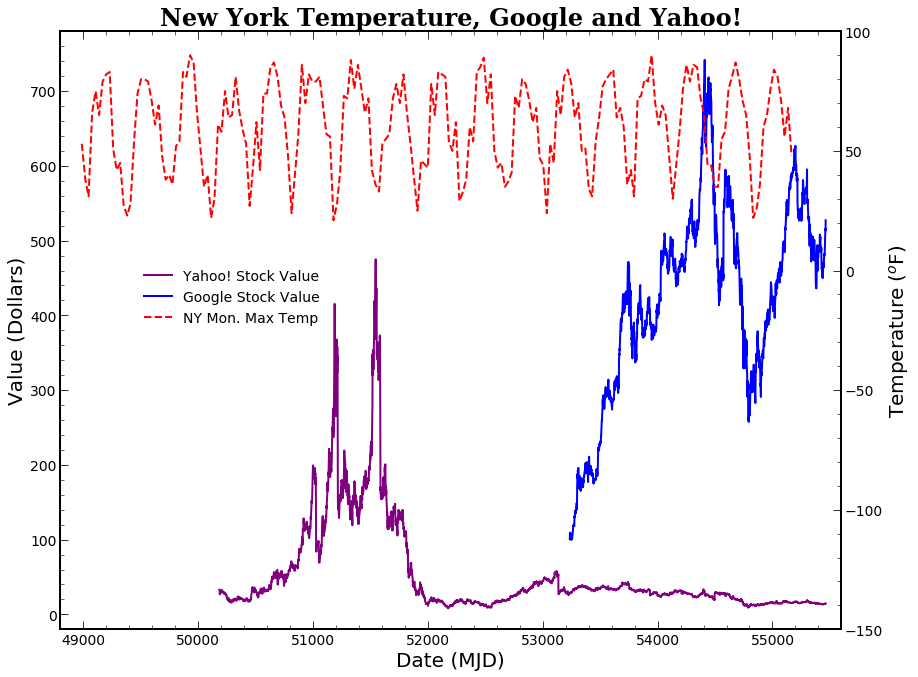

In [25]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Read in data
## New York Temperatures
nytemps = pd.read_csv('./hw_2_data/ny_temps.txt',sep='\t',header=0, index_col=0)
## Google Stock Value
gstock = pd.read_csv('./hw_2_data/google_data.txt',sep='\t',header=0, index_col=0)
## Yahoo Stock Value
ystock = pd.read_csv('./hw_2_data/yahoo_data.txt',sep='\t',header=0, index_col=0)

# Set up mpl defaults / options
mpl.rc('figure', titlesize = 'large')
mpl.rc('xtick', direction = 'in', top = True, labelsize = 14)
mpl.rcParams['xtick.minor.visible'] = True 
mpl.rcParams['xtick.minor.size'] = 4 
mpl.rcParams['xtick.major.size'] = 8
mpl.rc('ytick', direction = 'in', right = True, labelsize = 14) 
mpl.rcParams['ytick.minor.visible'] =True 
mpl.rcParams['ytick.minor.size'] = 4 
mpl.rcParams['ytick.major.size'] = 8 
mpl.rcParams['lines.linewidth'] = 2
mpl.rc('axes', linewidth = 2, titlesize = 24, titleweight = 'bold')

# Set up plot window and axes.
fig = plt.figure(figsize=(14,11))
ax1 = fig.add_subplot(111)
ax1.set_title('New York Temperature, Google and Yahoo!',family='serif')
ax1.set_ylabel('Value (Dollars)',fontsize=20, family = 'sans')
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature ($^o$F)',fontsize=20, family = 'sans')

# Plot data on relevant axes
y=ystock.plot(ax=ax1,color='purple',legend=False)
g=gstock.plot(ax=ax1,color='blue',legend=False)
n=nytemps.plot(ax=ax2, color = 'red', linestyle = '--',legend=False)

# Adjust Axis Labels Clobbered by Pandas plot
ax1.set_xlabel('Date (MJD)',fontsize=20, family = 'Sans')
ax1.set_xlim([48800,55600])
ax1.set_ylim([-20,780])
ax2.set_ylim([-150,100])

# Create legend by combining legend handles from the 2 axes
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
l1 = ['Yahoo! Stock Value','Google Stock Value']
l2 = ['NY Mon. Max Temp']
ax1.legend(h1+h2, l1+l2, loc=[.1,.5], fontsize = 14, frameon = False)